In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df_trade = pd.read_csv('data/Trade.csv')

In [8]:
df_trade.TradeDateKey = pd.to_datetime(df_trade.TradeDateKey, format='%Y%m%d')

In [19]:
df_trade['week_start'] = df_trade.TradeDateKey.dt.to_period('W-SUN').dt.start_time 

In [11]:
df_challenge = pd.read_csv('data/Challenge_20180423.csv')

In [12]:
df_challenge.DateKey = pd.to_datetime(df_challenge.DateKey, format='%Y%m%d')

In [27]:
df_challenge['week_start'] = df_challenge.DateKey.dt.to_period('W-SUN').dt.start_time 

# Visual

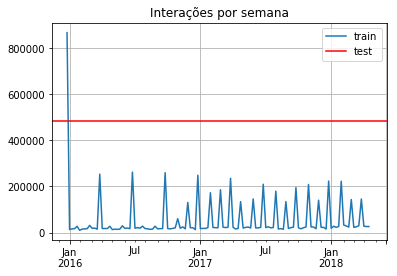

In [78]:
counts = df_trade.week_start.value_counts()
counts.name = 'train'
counts2 = df_challenge.week_start.value_counts()
counts2.name = 'test'

fig, ax1 = plt.subplots()
counts.sort_index().plot(ax=ax1, legend=True)
counts2.sort_index().plot(ax=ax1, legend=True, color='r')
ax1.axhline(len(df_challenge), color='r')
ax1.grid(True)
ax1.set_title('Interações por semana');

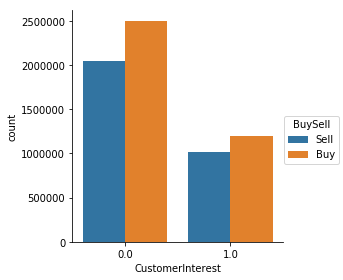

In [18]:
sns.factorplot('CustomerInterest', data=df_trade, hue='BuySell', kind='count');

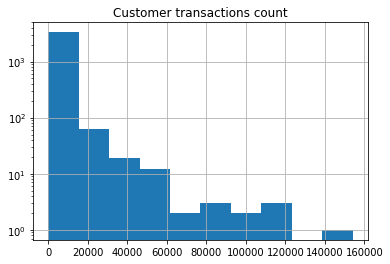

In [6]:
counts = df_trade.CustomerIdx.value_counts()
counts.hist(log=True).set_title('Customer transactions count');

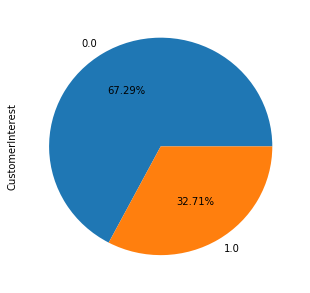

In [7]:
df_trade.CustomerInterest.value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f%%');

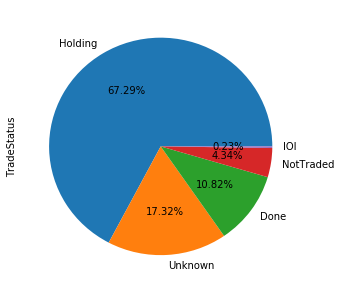

In [248]:
df_trade.TradeStatus.value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f%%');

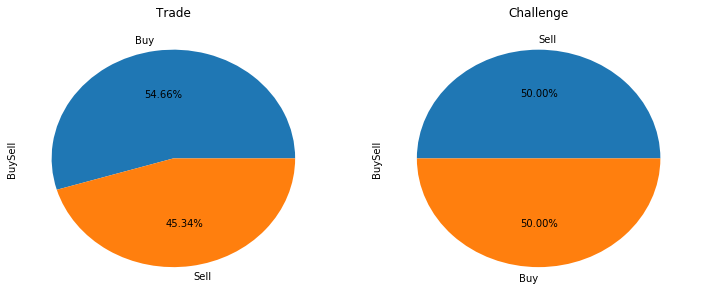

In [230]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
df_trade.BuySell.value_counts().plot(kind='pie', ax=ax1, autopct='%.2f%%', title='Trade')
df_challenge.BuySell.value_counts().plot(kind='pie', ax=ax2, autopct='%.2f%%', title='Challenge');

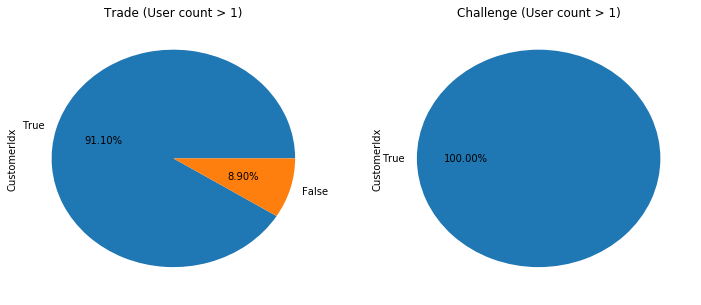

In [226]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
(df_trade.CustomerIdx.value_counts() > 1).value_counts().plot(
    kind='pie', ax=ax1, autopct='%.2f%%', title='Trade (User count > 1)')
(df_challenge.CustomerIdx.value_counts() > 1).value_counts().plot(
    kind='pie', ax=ax2, autopct='%.2f%%', title='Challenge (User count > 1)');

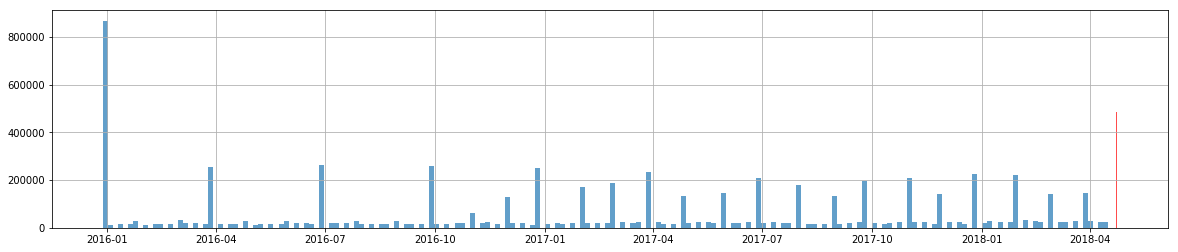

In [52]:
fig, ax1 = plt.subplots(1, 1, True, True, figsize=(20, 4))
df_trade.week_start.hist(ax=ax1, alpha=0.7, bins=200)
df_challenge.week_start.hist(ax=ax1, color='r', alpha=0.7);

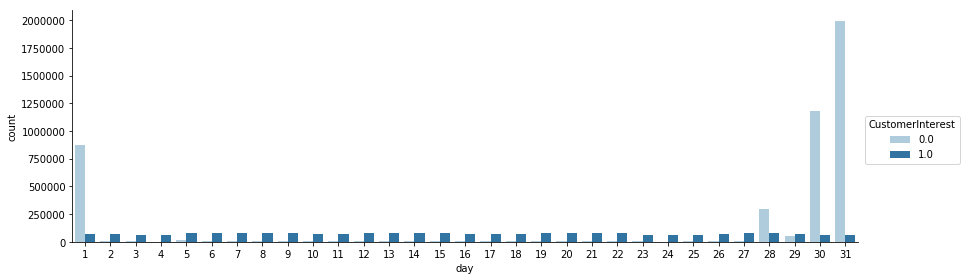

In [231]:
sns.factorplot('day', hue='CustomerInterest', data=df_trade, kind='count',
               sharey=True, palette='Paired', aspect=3);

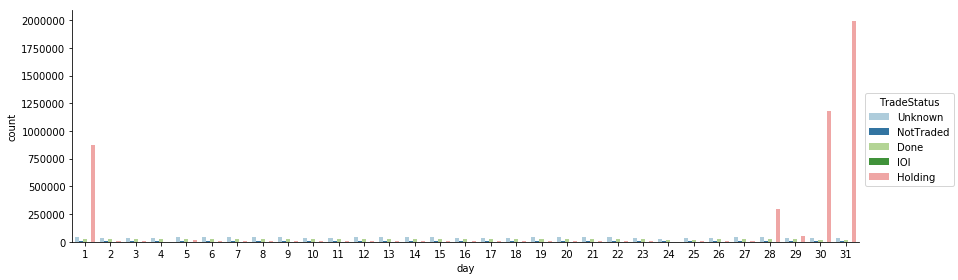

In [252]:
sns.factorplot('day', hue='TradeStatus', data=df_trade, kind='count',
               sharey=True, palette='Paired', aspect=3);